In [1]:
# Importing Libraries
# Linear Algebra
import numpy as np 

# Data Processing
import pandas as pd 

# Data Visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB

In [2]:
# Read test and train data
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [3]:
# Display information about train data
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
# Display some statistics for each column in train data
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# Display table view of train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Drop the Ticket column
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

# Drop the Name column
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

# Drop the PassengerId column for train data only
train_df = train_df.drop(['PassengerId'], axis=1)

In [7]:
# Check if Ticket, Name and PassengerId columns are dropped
train_df.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Cabin', 'Embarked'], dtype=object)

In [8]:
# Calculate how much data is missing/null from each column and display in a table
total = train_df.isnull().sum().sort_values(ascending=False)
temp = train_df.isnull().sum()/train_df.isnull().count()*100
percentage = (round(temp, 1)).sort_values(ascending=False)
result_table = pd.concat([total, percentage], axis=1, keys=['Total', '%'])
result_table.head(10)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Parch,0,0.0
SibSp,0,0.0
Sex,0,0.0
Pclass,0,0.0
Survived,0,0.0


In [9]:
# Drop the Cabin column because most of the data is null/empty
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [10]:
# Check if Cabin column is dropped
train_df.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'], dtype=object)

In [11]:
# Fill all null/empty values for Embarked with the most common value of 'S'
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [12]:
# Check if all embarked entries are filled with non-null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


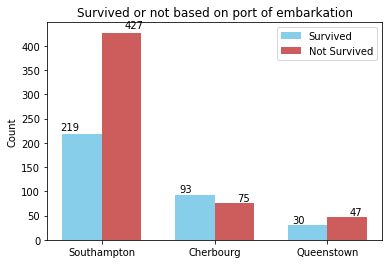

In [13]:
# Create a bar chart showing the amount of people that survived or not based on port of embarkation
# For data analysis purposes
ind = np.arange(3)
width = 0.35

southampton = train_df[train_df['Embarked']=='S']
cherbourg = train_df[train_df['Embarked']=='C']
queenstown = train_df[train_df['Embarked']=='Q']

survived_values = (len(southampton[southampton['Survived']==1]), len(cherbourg[cherbourg['Survived']==1]), len(queenstown[queenstown['Survived']==1]))
not_survived_values = (len(southampton[southampton['Survived']==0]), len(cherbourg[cherbourg['Survived']==0]), len(queenstown[queenstown['Survived']==0]))

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, survived_values, width, yerr=False,
                color='SkyBlue', label='Survived')
rects2 = ax.bar(ind + width/2, not_survived_values, width, yerr=False,
                color='IndianRed', label='Not Survived')

ax.set_ylabel('Count')
ax.set_title('Survived or not based on port of embarkation')
ax.set_xticks(ind)
ax.set_xticklabels(('Southampton', 'Cherbourg', 'Queenstown'))
ax.legend()


def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

In [14]:
# Fill the null/empty values for age with a random age
# between (mean_age - age_standard_deviation) and (mean_age + age_standard_deviation)
data = [train_df, test_df]

for dataset in data:
    mean = dataset["Age"].mean()
    stdev = dataset["Age"].std()
    total_nulls = dataset["Age"].isnull().sum()
    random_age = np.random.randint(mean - stdev, mean + stdev, size = total_nulls)
    temp = dataset["Age"].copy()
    temp[np.isnan(temp)] = random_age
    dataset["Age"] = temp
    dataset["Age"] = dataset["Age"].astype(int)

In [15]:
# Check if all ages are filled with non-null values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(1), int64(5), object(2)
memory usage: 55.8+ KB


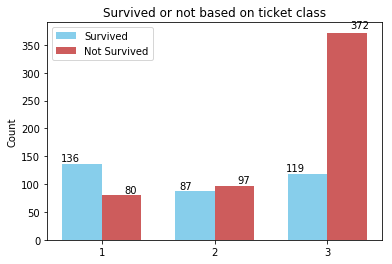

In [16]:
# Create a bar chart showing the amount of people that survived or not based on ticket class
# For data analysis purposes
ind = np.arange(3)
width = 0.35

one = train_df[train_df['Pclass']==1]
two = train_df[train_df['Pclass']==2]
three = train_df[train_df['Pclass']==3]

survived_values = (len(one[one['Survived']==1]), len(two[two['Survived']==1]), len(three[three['Survived']==1]))
not_survived_values = (len(one[one['Survived']==0]), len(two[two['Survived']==0]), len(three[three['Survived']==0]))

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, survived_values, width, yerr=False,
                color='SkyBlue', label='Survived')
rects2 = ax.bar(ind + width/2, not_survived_values, width, yerr=False,
                color='IndianRed', label='Not Survived')

ax.set_ylabel('Count')
ax.set_title('Survived or not based on ticket class')
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', '3'))
ax.legend()


def autolabel(rects, xpos='center'):
    xpos = xpos.lower()
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0.5, 'right': 0.57, 'left': 0.43}

    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()*offset[xpos], 1.01*height,
                '{}'.format(height), ha=ha[xpos], va='bottom')


autolabel(rects1, "left")
autolabel(rects2, "right")

plt.show()

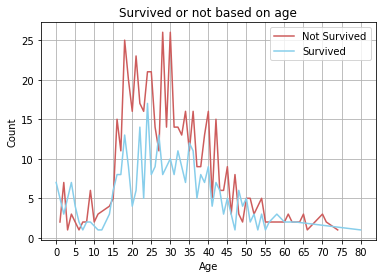

In [17]:
# Create a line graph showing the amount of people that survived or not based on age
# For data analysis purposes
not_survived = train_df[train_df['Survived']==0]
survived = train_df[train_df['Survived']==1]

nt,ns = np.unique(not_survived['Age'].values, return_counts=True)
t,s = np.unique(survived['Age'].values, return_counts=True)

fig, ax = plt.subplots()
ax.plot(nt, ns, color='IndianRed', label='Not Survived')
ax.plot(t, s, color='SkyBlue', label='Survived')

ax.set(xlabel='Age', ylabel='Count',
       title='Survived or not based on age')
ax.grid()
ax.legend()
lim = ax.get_xlim()
ax.set_xticks(list(ax.get_xticks()) + list([5,15,25,35,45,55,65,75]))
ax.set_xlim(lim)
plt.show()

In [18]:
# Convert age data type to integer
# Group the data into categories from 0-7 based on survival rate and age
data = [train_df, test_df]

for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 20), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 27), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 32), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 37), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 37) & (dataset['Age'] <= 42), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 42) & (dataset['Age'] <= 55), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 55, 'Age'] = 7

In [19]:
# Convert port of embarkation data into integers
genders = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(genders)

In [20]:
# Convert gender into integers
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [21]:
# Fill empty/null fare price values with 0 and convert data type to integer
data = [train_df, test_df]
for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

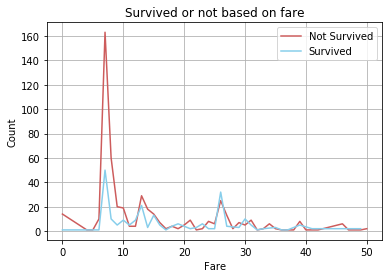

In [22]:
# Create a line graph showing the amount of people that survived or not based on fare prices between 0 and 50
# For data analysis purposes
not_survived = train_df[train_df['Survived']==0]
survived = train_df[train_df['Survived']==1]

nt,ns = np.unique(not_survived.loc[not_survived['Fare'] <= 50, 'Fare'], return_counts=True)
t,s = np.unique(survived.loc[survived['Fare'] <= 50, 'Fare'], return_counts=True)

fig, ax = plt.subplots()
ax.plot(nt, ns, color='IndianRed', label='Not Survived')
ax.plot(t, s, color='SkyBlue', label='Survived')

ax.set(xlabel='Fare', ylabel='Count',
       title='Survived or not based on fare')
ax.grid()
ax.legend()
plt.show()

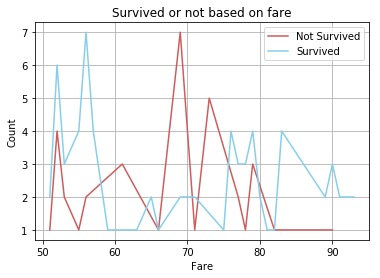

In [23]:
# Create a line graph showing the amount of people that survived or not based on fare prices between 50 and 100
# For data analysis purposes
not_survived = train_df[train_df['Survived']==0]
survived = train_df[train_df['Survived']==1]

nt,ns = np.unique(not_survived.loc[(not_survived['Fare'] > 50) & (not_survived['Fare'] <= 100), 'Fare'], return_counts=True)
t,s = np.unique(survived.loc[(survived['Fare'] > 50) & (survived['Fare'] <= 100), 'Fare'], return_counts=True)

fig, ax = plt.subplots()
ax.plot(nt, ns, color='IndianRed', label='Not Survived')
ax.plot(t, s, color='SkyBlue', label='Survived')

ax.set(xlabel='Fare', ylabel='Count',
       title='Survived or not based on fare')
ax.grid()
ax.legend()
plt.show()

In [24]:
# Group the data into categories from 0-7 based on survival rate and fare price
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 5, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 5) & (dataset['Fare'] <= 10), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10) & (dataset['Fare'] <= 17), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 25), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 25) & (dataset['Fare'] <= 28), 'Fare']   = 4
    dataset.loc[(dataset['Fare'] > 28) & (dataset['Fare'] <= 65), 'Fare']   = 5
    dataset.loc[(dataset['Fare'] > 65) & (dataset['Fare'] <= 100), 'Fare']   = 6
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 7
    dataset['Fare'] = dataset['Fare'].astype(int)

In [25]:
# Check if the train data is converted
train_df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,2,1,0,1,0
1,1,1,1,5,1,0,6,1
2,1,3,1,2,0,0,1,0
3,1,1,1,4,1,0,5,0
4,0,3,0,4,0,0,1,0
5,0,3,0,2,0,0,1,2
6,0,1,0,6,0,0,5,0
7,0,3,0,0,3,1,3,0
8,1,3,1,2,0,2,2,0
9,1,2,1,0,1,0,5,1


In [26]:
# Create x and y train tables and x test table for modeling and predictions
x_train = train_df.drop("Survived", axis=1)
y_train = train_df["Survived"]
x_test  = test_df.drop("PassengerId", axis=1).copy()

In [27]:
# Gaussian Naive Bayes model
gaussian_naive_bayes = GaussianNB(var_smoothing=0.0001)
gaussian_naive_bayes.fit(x_train, y_train)

y_predict_gnb = gaussian_naive_bayes.predict(x_test)
test_df['Survived'] = pd.Series(y_predict_gnb, index=test_df.index)

acc_gaussian = round(gaussian_naive_bayes.score(x_train, y_train) * 100, 2)

In [28]:
# Perceptron model
perceptron = Perceptron(max_iter=250, tol=0.00001)
perceptron.fit(x_train, y_train)

y_predict_perceptron = perceptron.predict(x_test)

acc_perceptron = round(perceptron.score(x_train, y_train) * 100, 2)

In [29]:
# List the model scores
results = pd.DataFrame({
    'Model': ['Naive Bayes', 'Perceptron'],
    'Score': [acc_gaussian, acc_perceptron]
})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head()

,Model
Score,
78.23,Perceptron
77.44,Naive Bayes


In [30]:
# Store Gaussian Naive Bayes model predictions into csv file (follows Kaggle submission requirement)
test_df.to_csv(path_or_buf='result.csv', index=False, columns=['PassengerId','Survived'])